In [35]:
# This project is made to visualize the density of subway entrances 
# for each train line in New York City. 
# Dataset retrieved courtesy of NYC Open Data

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import folium
from matplotlib.pyplot import figure
from folium.plugins import HeatMap

# read data using pandas
# link to data set https://data.cityofnewyork.us/Transportation/Subway-Entrances/drex-xx56
df=pd.read_csv('/content/DOITT_SUBWAY_ENTRANCE_01_13SEPT2010 (1).csv')

# separate elements in LINE column into separate rows
df['LINE']=df['LINE'].str.split('-')
df=df.explode('LINE')
#print(df.head())

# fixing typo
df['LINE'] = df['LINE'].str.replace('e', 'E')

# series of counts
print(df['LINE'].value_counts())

R      297
F      284
A      273
C      272
2      267
5      228
1      221
B      220
6      219
M      219
D      211
3      203
Q      188
4      184
E      182
N      177
7      139
J      134
L      111
Z      108
G       73
SIR     48
S       22
GS      17
H       13
FS      12
B        8
Name: LINE, dtype: int64


73


Text(0, 0.5, 'Number of Entrances')

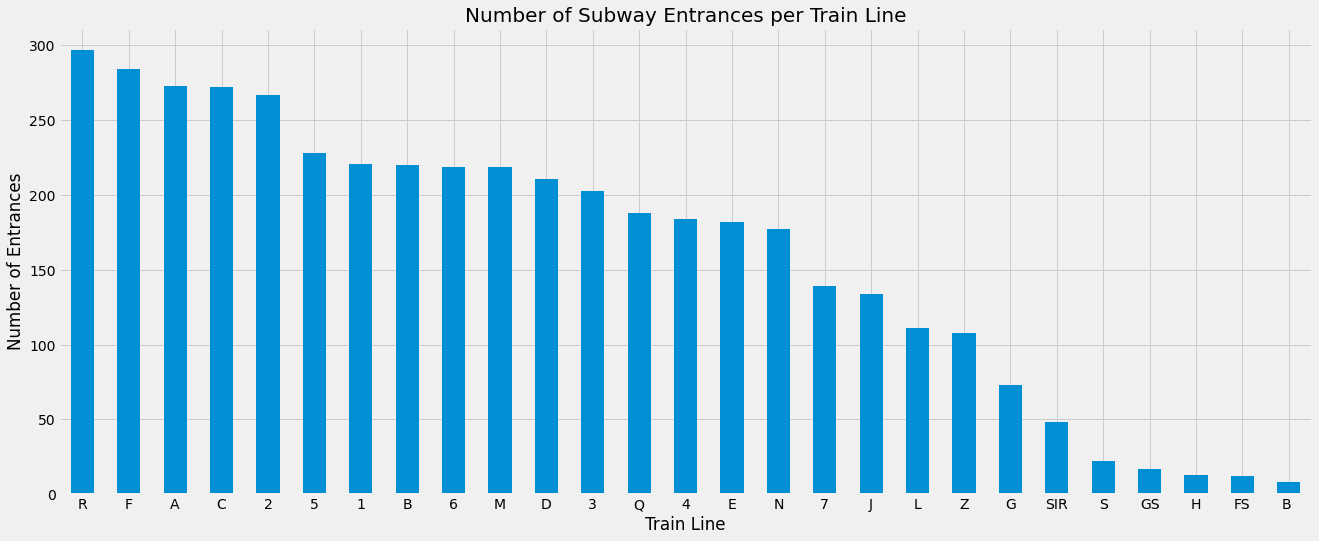

In [36]:
# storing value count of entrances to a dictionary
counts = df['LINE'].value_counts().to_dict()

# testing dictionary
print(counts['G'])

# input results into graphs 
matplotlib.style.use('fivethirtyeight')
ax=df.LINE.value_counts().plot.bar(x="LINE", y='counts', rot=0, figsize=(20, 8))
plt.title('Number of Subway Entrances per Train Line', fontsize=20)
plt.xlabel("Train Line")
plt.ylabel("Number of Entrances")


<Figure size 576x720 with 0 Axes>

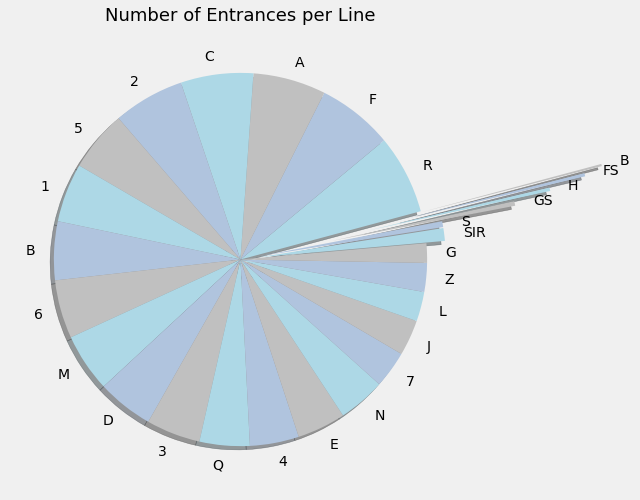

<Figure size 576x720 with 0 Axes>

In [37]:
# now make a pie chart
df2 = df.value_counts('LINE')
colors=['lightblue','lightsteelblue','silver']
explode=(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.1,0.5,0.7,0.9,1)
ax=df2.plot.pie(explode=explode, figsize=(8,8),startangle=15, shadow=True, 
                                   colors=colors,pctdistance=0.8)
plt.title('Number of Entrances per Line', color='black', size=18)

# set as empty string to remove "none" label
plt.ylabel("")

# get the keys from dictionary and store them in a list
labels = list(counts.keys())

# get the values from dictionary and store them in a list
values = list(counts.values())

# make pie chart bigger
plt.figure(figsize=(8,10))



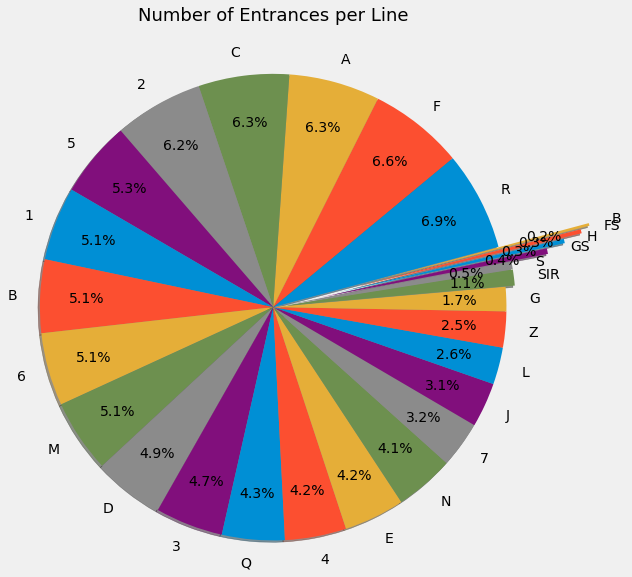

<Figure size 640x480 with 0 Axes>

In [50]:
# plot another pie chart with percents
plt.pie(values, labels=labels, explode=explode, startangle=15, shadow=True, 
                                   autopct='%1.1f%%',pctdistance=0.8,radius = 2.5)
explode=(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.1,0.5,0.7,0.9,1)
plt.title('Number of Entrances per Line', color='black', size=18,pad=170)
figure(figsize=(8, 6), dpi=80)
plt.show()


In [51]:
# edit column of geological location for easier mapping by 
# removing characters with known positions using lamda function

df['the_geom'] = df['the_geom'].map(lambda x: str(x)[7:-1])
df.head()


# add two new columns to the existing dataframe
# by default splitting is done on the basis of single space

df[['longitude','latitude']]=df.the_geom.str.split(" ",expand=True)
print(df.info)

# check column data type 
print(df['latitude'].dtypes)
print(df['longitude'].dtypes)

<bound method DataFrame.info of       OBJECTID                                URL  \
0         1734  http://web.mta.info/nyct/service/   
0         1734  http://web.mta.info/nyct/service/   
1         1735  http://web.mta.info/nyct/service/   
1         1735  http://web.mta.info/nyct/service/   
2         1736  http://web.mta.info/nyct/service/   
...        ...                                ...   
1923      1928  http://web.mta.info/nyct/service/   
1924      1929  http://web.mta.info/nyct/service/   
1925      1930  http://web.mta.info/nyct/service/   
1926      1931  http://web.mta.info/nyct/service/   
1927      1932  http://web.mta.info/nyct/service/   

                                         NAME  \
0     Birchall Ave & Sagamore St at NW corner   
0     Birchall Ave & Sagamore St at NW corner   
1     Birchall Ave & Sagamore St at NE corner   
1     Birchall Ave & Sagamore St at NE corner   
2     Morris Park Ave & 180th St at NW corner   
...                                  

In [54]:
# creating a map of NYC
map_nyc=folium.Map(location=[40.730610,-73.935242],zoom_start=12,control_scale=True)

df['latitude'] = pd.to_numeric(df['latitude'])
df['longitude']= pd.to_numeric(df['longitude'])

# create a list
heat_df = df[['latitude', 'longitude']]
heat_data = [[row['latitude'],row['longitude']] for index, row in heat_df.iterrows()]


# plot list into heat map
HeatMap(heat_data).add_to(map_nyc)

map_nyc

In [ ]:
# make another map
map_nyc2=folium.Map(location=[40.730610,-73.935242],zoom_start=12,control_scale=True)


# use for loop to plot stations 
for i in range(0, len(df)):
    folium.Marker([df.iloc[i]['latitude'], df.iloc[i]['longitude']],
                 popup=df.iloc[i]['LINE'],icon=folium.Icon(color='green')).add_to(map_nyc2)
   
map_nyc2